In [1]:
import copy
from copy import deepcopy
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D , LSTM, Attention
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import*
import random as random
import time
import matplotlib.pyplot as plt

import Seth
from Seth import fetch_seth, Devices, Floorplan, get_mac_ids

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
def train_data():
    # dfs is a list of dataframes
# meta is a dataframe with meta data

#getting train data
    train_fp, train_meta = fetch_seth(
    Devices.lg,
    Floorplan.OFFICE,
    ci = 0,
    base_path="temp/clean/"  # <-- this would be 'seth/temp/clean' from outside this dir
)
    train_fp = train_fp.sample(frac=1).reset_index(drop=True)
    train_aps = get_mac_ids(train_fp.columns)
    train_x = train_fp[train_aps].values
    train_x = (train_x + 100)/100
    train_y = (train_fp["label"]).values
    return train_x, train_y, train_aps

In [3]:
def mean_cal(group):
    for i in range (0, len(group)):
        if group[i] < 0:
            group[i] = -group [i]
    mean_diff = np.mean(group)
    return mean_diff

In [4]:
# print(train_x.shape)
# train_x.reshape( 1,366, 206 )
# a = train_x.flatten()
# print(a.shape)

In [5]:
train_x, train_y, train_aps = train_data()
np.unique(train_y).shape


(48,)

In [6]:
def test_data(itr, train_aps):
    #getting test data
    test_fp, test_meta = fetch_seth(
    Devices.lg ,
    Floorplan.OFFICE,
    ci = 0,
    base_path="temp/clean/"  # <-- this would be 'seth/temp/clean' from outside this dir
)
    test_aps = get_mac_ids(test_fp.columns)
    missing_aps = list(set(train_aps)-set(test_aps))
    test_fp[missing_aps] = -100
    test_x = test_fp[train_aps].values
    test_x = (test_x + 100)/100
    test_y = (test_fp["label"]).values
    return test_x, test_y


In [7]:
#pred_2 = pred_2.reshape(1,pred_2.shape[0])
# print(pred_2.shape)
# print(train_x.shape)


In [8]:
learning_rate=1e-4
num_classes = 48
callbacks = [tf.keras.callbacks.EarlyStopping(patience=300)]

error = []
mean_error = []


batch_size = 32
input_noise=0.05
label_noise=0.05



input_shape= train_x.shape
print(input_shape) # 100,90


def encoder(input_shape):
        # TODO: Add gaussian noise and dropout layer
        encoder_1 = Sequential([
            keras.layers.Input(shape=(input_shape,)),
            keras.layers.Dropout(0.15),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(500, activation='relu')])
        return encoder_1
def decoder():
        decoder_1 = Sequential([
                Dense(1000, activation='relu',input_shape=[500]),
                Dense(203, activation='sigmoid')])
        return decoder_1

encoder_1 = encoder(input_shape[1])
autoencoder = Sequential ([encoder_1,decoder()])

autoencoder.compile(optimizer='adam', loss='MSE')
autoencoder.fit(train_x, train_x,
        epochs=1000,
        callbacks = callbacks,
        validation_split = 0.2,
        verbose=1)


(288, 203)
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/1000


2022-04-02 22:34:09.966429: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-02 22:34:09.969679: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-02 22:34:10.117946: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-02 22:34:10.118376: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/8 [==>...........................] - ETA: 2s - loss: 0.1919

2022-04-02 22:34:10.273333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 36ms/step - loss: 0.1153 - val_loss: 0.0177
Epoch 2/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.0175 - val_loss: 0.0159
Epoch 3/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0156

2022-04-02 22:34:10.678386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 15ms/step - loss: 0.0156 - val_loss: 0.0156
Epoch 4/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0150 - val_loss: 0.0150
Epoch 5/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.0147 - val_loss: 0.0145
Epoch 6/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.0145 - val_loss: 0.0149
Epoch 7/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0143 - val_loss: 0.0144
Epoch 8/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0141 - val_loss: 0.0144
Epoch 9/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.0141 - val_loss: 0.0141
Epoch 10/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0139 - val_loss: 0.0141
Epoch 11/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0139 - val_loss: 0.0141
Epoch 12/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.0139 - val_loss: 0.0141
Epoch 13/1000
8/8 [=

In [9]:
autoencoder.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 500)               704500    
_________________________________________________________________
sequential_1 (Sequential)    (None, 203)               704203    
Total params: 1,408,703
Trainable params: 1,408,703
Non-trainable params: 0
_________________________________________________________________


In [14]:
from maril.helpers import (split_frame, compute_distances, 
                           label2coords_builder, get_visible_waps, 
                           import_model, export_model)
from maril.data import (Devices, Floorplan, 
                        build_dataset, MAC_RE)

ModuleNotFoundError: No module named 'maril'

In [ ]:
ad_train_model = build_ad_train(
    layers=layers,
    input_noise=input_noise,
    label_noise=label_noise,
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss=keras.losses.sparse_categorical_crossentropy,
    name=f"{dev}_{path}" # HAVING CORRECT MODEL NAME IS IMPORTANT
)

In [13]:
test_x, test_y = test_data(0, train_aps)
auto_pred = autoencoder.predict(test_x)
print(auto_pred.shape)

(288, 203)


In [ ]:

#autoencoder_2_input = np.concatenate((pred_2 , train_x))
autoencoder_1 = Sequential ([encoder(auto_pred.shape[1]),decoder()])
autoencoder_1.compile(optimizer='adam', loss='MSE')
autoencoder_1.fit(train_x, train_x,
        epochs=1000,
        callbacks = callbacks,
        validation_split = 0.2,
        verbose=1)


In [40]:
learning_rate=1e-4
num_classes = 48
callbacks = [tf.keras.callbacks.EarlyStopping(patience=300)]

error = []
mean_error = []


batch_size = 32
input_noise=0.05
label_noise=0.05



input_shape= train_x.shape
print(input_shape) # 100,90


def encoder(input_shape):
        # TODO: Add gaussian noise and dropout layer
        encoder_1 = Sequential([
            keras.layers.Input(shape=(input_shape,)),
            keras.layers.Dense(50, activation='relu'),
            keras.layers.Dropout(0.15),
            keras.layers.Dense(100, activation='relu')])
        return encoder_1
def decoder(input_shape):
        decoder_1 = Sequential([Dense(100, activation='relu'),Dense(50, activation='relu'),Dense(input_shape, activation='softmax')])
        return decoder_1

encoder_1 = encoder(input_shape[1])
autoencoder_2 = Sequential ([encoder_1,decoder(input_shape[1])])

autoencoder_2.compile(optimizer='adam', loss='MSE')
autoencoder_2.fit(train_x, train_x,
        epochs=1000,
        callbacks = callbacks,
        validation_split = 0.2,
        verbose=1)



(288, 203)
Epoch 1/1000
7/8 [=========================>....] - ETA: 0s - loss: 0.0213

2022-04-02 22:33:45.500267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 25ms/step - loss: 0.0213 - val_loss: 0.0209
Epoch 2/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0213 - val_loss: 0.0209
Epoch 3/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0214

2022-04-02 22:33:45.729640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 9ms/step - loss: 0.0213 - val_loss: 0.0209
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0213 - val_loss: 0.0208
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0212 - val_loss: 0.0205
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0207 - val_loss: 0.0196
Epoch 7/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0199 - val_loss: 0.0190
Epoch 8/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0195 - val_loss: 0.0188
Epoch 9/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0193 - val_loss: 0.0186
Epoch 10/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0191 - val_loss: 0.0184
Epoch 11/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0189 - val_loss: 0.0182
Epoch 12/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0187 - val_loss: 0.0182
Epoch 13/1000
8/8 [=========

KeyboardInterrupt: 

In [14]:
# encoder input model
inputs = keras.layers.Input(shape=(input_shape[1],))
encoder1 = keras.layers.Embedding(train_x, 128)(inputs)
encoder2 = LSTM(128)(encoder1)
encoder3 = keras.layers.RepeatVector(input_shape)(encoder2)
# decoder output model
decoder1 = LSTM(128, return_sequences=True)(encoder3)
outputs = keras.layers.TimeDistributed(Dense(train_x, activation='softmax'))(decoder1)
# tie it together
model = keras.layers.Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
test_x, test_y = test_data(0, train_aps)

pred_2 = np.argmax(autoencoder_2.predict(train_x), axis =1)
#autoencoder_2_input = np.concatenate((pred_2 , train_x[1]))
print(pred_2.shape)
#autoencoder_2_input = np.concatenate((pred_2 , train_x))
autoencoder_3 = Sequential ([encoder(pred_2.shape),decoder(input_shape[1])])
autoencoder_3.compile(optimizer='adam', loss='MSE')
autoencoder_3.fit(pred_2, pred_2,
        epochs=1000,
        callbacks = callbacks,
        validation_split = 0.2,
        verbose=1)

#pred_2 = pred_2.reshape(1,pred_2.shape[0])
# autoencoder_2_input = np.concatenate(pred_2 , train_x)
# print(autoencoder_2_input.shape)



pred_3 = np.argmax(autoencoder_3.predict(pred_2), axis =1)
#autoencoder_3_input = np.concatenate((pred_3 , train_x))
autoencoder = Sequential ([encoder(pred_3.shape),decoder(input_shape[1])])
autoencoder.compile(optimizer='adam', loss='MSE')
autoencoder.fit(pred_3, pred_3,
        epochs=1000,
        callbacks = callbacks,
        validation_split = 0.2,
        verbose=1)

In [ ]:
mean_error=[]

In [ ]:
print(test_x)

[[0.43 0.36 0.36 ... 0.   0.   0.  ]
 [0.44 0.35 0.35 ... 0.   0.   0.  ]
 [0.43 0.35 0.36 ... 0.   0.   0.  ]
 ...
 [0.   0.2  0.21 ... 0.   0.17 0.17]
 [0.   0.2  0.2  ... 0.   0.16 0.16]
 [0.   0.2  0.21 ... 0.   0.16 0.16]]


In [ ]:
print(pred_3)

[15 27 18 28  1 28 38  2 17 16 16 34 23 21 10 38 17 25 25 38 38  2 46 27
 39 17 25  1 46  2 34  9 24 46 36 38 25 33 39 38 14 25 41 33 38 22  0 21
 25 15 18  2 27 32 40 16 33 28 46 43 29 15 36 28  5 41  4  7 14 12  6 16
 43 39 34 31 24 25 29  0 24 13 44 41 33 13  8 43 44 14 36 12 33  1  4 18
 18 28 20  7  5 40  5 28 19 20 23  9 21  8 19 32 38  4 33 41 15  0 22 43
 36 33 31 43 21 24 27 46  3  8 20 12 17  7 44  0 10  6 13  0 40 22 41 36
 46 11  5 13  6  6 18 32 33 12 27  5 13 29 31 33 19 38 19  2 31  3  6 23
 39 12 19 21 36 38 10  9 36 41  1  3 16 39 23 14 29 40  6 36 28 10  7  4
 41 19 33 32 44 46 33 46 41  7 34  0 22 44  5 14 38  2  8 28 20 16 22 41
 40  4 32 46  9 25 28 41  3 24 25 17 11 23 21 36 36  9  1 46 14  7 43 10
 20  9 22  9 41  8 41 11  8 36 31 15 33 27 46 24 27 10 20  3 13 25  3 40
 23 12 43 39 28 25 11 28 31 28 15 36 38 36 17  7 36 18 31 25 29 12 46  0]


In [ ]:
dev_list = ['lg', 'blu', 'htc', 'moto','s7','op3']
for dev in dev_list:
    def test_data(dev, train_aps):
        #getting test data
        test_fp, test_meta = fetch_seth(
        dev ,
        Floorplan.OFFICE,
        ci = 0,
        base_path="temp/clean/"  # <-- this would be 'seth/temp/clean' from outside this dir
    )
        test_aps = get_mac_ids(test_fp.columns)
        missing_aps = list(set(train_aps)-set(test_aps))
        test_fp[missing_aps] = -100
        test_x = test_fp[train_aps].values
        test_x = (test_x + 100)/100
        test_y = (test_fp["label"]).values
        pred = np.argmax(autoencoder_2.predict(test_x), axis=1)
        #pred = np.concatenate((autoencoder_2 , train_x))
        acc = sum([(test_y[i])==(pred[i]) for i in range(288)])/288
        print('Test accuracy:', acc)


        for i in range (0, len(pred)):
            error.append(test_y[i]-pred[i])
            
        mean_error.append([mean_cal(error)])

        # lg , blu, htc, moto, s7
        # office
        return mean_error
    mean_error = test_data(dev, train_aps)
print("Mean Error  = ", mean_error)


Test accuracy: 0.003472222222222222
Test accuracy: 0.013888888888888888


2022-03-28 19:20:59.302731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Test accuracy: 0.013888888888888888
Test accuracy: 0.0
Test accuracy: 0.0
Test accuracy: 0.0
Mean Error  =  [[42.302083333333336], [41.807291666666664], [41.66550925925926], [41.743923611111114], [41.765972222222224], [41.34953703703704]]


In [22]:
#devices = ['Devices.lg', 'Devices.blu', 'Devices.htc', 'Devices.moto', 'Devices.s7', 'Devices.op3']
#for dev in devices:
#print(dev)
test_x, test_y = test_data(0, train_aps)

pred = np.argmax(autoencoder.predict(test_x), axis=1)
#pred = np.concatenate((autoencoder_2 , train_x))
acc = sum([(test_y[i])==(pred[i]) for i in range(288)])/288
print('Test accuracy:', acc)


for i in range (0, len(pred)):
    error.append(test_y[i]-pred[i])
    
mean_error.append([mean_cal(error)])

# lg , blu, htc, moto, s7
# office
print("Mean Error  = ", mean_error)

Test accuracy: 0.19791666666666666
Mean Error  =  [[0.0625], [1.328125], [1.8194444444444444], [2.0651041666666665], [2.2125], [2.082175925925926]]


In [14]:
import seaborn as sb

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


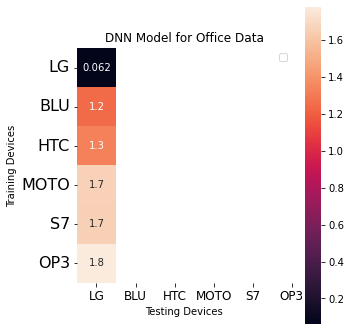

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
x_axis_labels = ['LG','BLU','HTC','MOTO','S7','OP3'] # labels for x-axis
y_axis_labels = ['LG','BLU','HTC','MOTO','S7','OP3'] # labels for y-axis
sb.heatmap(mean_error, xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True, square=True, ax=ax)
plt.title("DNN Model for Office Data")
plt.xlabel('Testing Devices',)
plt.ylabel('Training Devices',)
plt.yticks(rotation=0,fontsize=16);
plt.xticks(fontsize=12);
plt.legend()
plt.tight_layout()
plt.savefig("DNN_heatmap_office.png")
plt.show()